In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

In [77]:
data=pd.read_csv("//content//drive//MyDrive//Notebook//spam.csv",encoding='latin-1')

In [78]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [79]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [80]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [81]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
data['v1']=data['v1'].map({'ham':0, 'spam':1})

In [83]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
data.isna().sum()

v1    0
v2    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

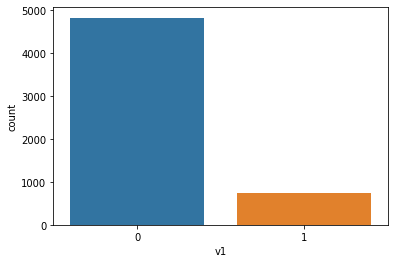

In [85]:
sns.countplot(data['v1'])

In [86]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [88]:
data['v2'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [89]:
corpus=[]

In [90]:
for i in range(len(data)):
  msg=re.sub('[^a-zA-Z]',' ',data['v2'][i])
  msg=msg.lower()
  msg=msg.split()
  sb=SnowballStemmer(language='english')
  msg=[sb.stem(word) for word in msg if not word in set(stopwords.words('english'))]
  msg=' '.join(msg)
  corpus.append(msg)

In [91]:
corpus[2]

'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli'

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=data.iloc[:,0].values

In [93]:
x.shape

(5572, 6216)

In [94]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
y.shape

(5572,)

In [96]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [97]:
# pip install --upgrade scikit-learn

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [100]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [101]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
x_train.shape

(4457, 6216)

In [103]:
y_train.shape

(4457,)

In [104]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [105]:
model.fit(x_train,y_train)

MultinomialNB()

In [106]:
y_pred=model.predict(x_test)

In [107]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:>

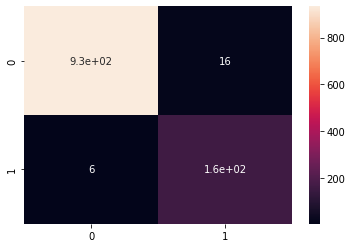

In [108]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True)

In [109]:
from sklearn.metrics import precision_score, recall_score

In [110]:
print("Precision Score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))

Precision Score:  0.9090909090909091
recall score:  0.963855421686747


In [111]:
text = 'subscribe to my youtube channel gopikanth and machine learning for free'
text = np.array([text])
text_vector = cv.transform(text)
model.predict(text_vector)

array([1])

In [112]:
text = 'what are you doing'
text = np.array([text])
text_vector = cv.transform(text)
model.predict(text_vector)

array([0])

In [113]:
# logistric regression

In [114]:
# from sklearn.linear_model import LogisticRegression

In [115]:
# model1=LogisticRegression()

In [116]:
# model1.fit(x_train,y_train)

LogisticRegression()

In [117]:
# y_pred1=model1.predict(x_test)

In [118]:
# print("Precision Score: ",precision_score(y_test,y_pred1))

Precision Score:  1.0


In [119]:
# print("recall score: ",recall_score(y_test,y_pred1))

recall score:  0.8493975903614458


In [123]:
# text = 'what are you doing'
# text = np.array([text])
# text_vector = cv.transform(text)
# model1.predict(text_vector)

array([0])